# HMMA307 Two-way ANNOVA

## Introduction

In this project we are going to apply the Anova on two different datasets. We will start by applying Anova on the "Vélos totem albert" data set, Before we apply the Anova on "accidents de vélo" data set.

# Part 1:
apply with Python an Anova with 2 factros using the $statsmodels$ package:

In [5]:
# Import Packages
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from download import download
import seaborn as sns
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set_palette("colorblind")

ModuleNotFoundError: No module named 'download'

First we import ourdataset:

In [3]:
url = "josephsalmon.eu/enseignement/datasets/Donnees_Comptages_Velos_Totem_Albert_1er_verbose.csv"

script_dir = os.path.abspath("")

download(url, script_dir, replace=False)

NameError: name 'os' is not defined

In [3]:
Totem = pd.read_csv("Donnees_Comptages_Velos_Totem_Albert_1er_verbose.csv", header=1)
Totem = Totem[Totem.columns[0:4]]
Totem.dropna(inplace=True)
Totem.columns = ["date", "time", "GTotal", "TTotal"]
Totem.head()

,date,time,GTotal,TTotal
1,12/03/2020,11:05:00,109,109
2,12/03/2020,14:30:00,441,441
3,13/03/2020,10:02:00,1 921,385
4,13/03/2020,14:15:00,2 305,769
5,13/03/2020,18:21:00,2 822,1 286


In [4]:
Totem.describe()

,date,time,GTotal,TTotal
count,819,819,819,819
unique,182,554,808,591
top,03/07/2020,19:04:00,68797,44
freq,16,5,2,8


In [5]:
Totem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 1 to 820
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    819 non-null    object
 1   time    819 non-null    object
 2   GTotal  819 non-null    object
 3   TTotal  819 non-null    object
dtypes: object(4)
memory usage: 32.0+ KB


In [6]:
Totem['GTotal'] = [float(str(val).replace(' ','').replace(',','.').replace("\u202f", "")) for val in Totem['GTotal'].values]
Totem['TTotal'] = [float(str(val).replace(' ','').replace(',','.').replace("\u202f", "")) for val in Totem['TTotal'].values]
Totem.head()

,date,time,GTotal,TTotal
1,12/03/2020,11:05:00,109.0,109.0
2,12/03/2020,14:30:00,441.0,441.0
3,13/03/2020,10:02:00,1921.0,385.0
4,13/03/2020,14:15:00,2305.0,769.0
5,13/03/2020,18:21:00,2822.0,1286.0


In [7]:
Totem['date_time'] = Totem['date'].astype(str) + ' ' + Totem['time']
Totem['date_time'] = pd.to_datetime(Totem.date_time)
Totem.dtypes
#Totem['TTotal'] = Totem['TTotal'].replace({' ': ''})
#Totem['GTotal'] = Totem['GTotal'].replace({' ': ''})
#Totem['TTotal'] = pd.to_numeric(Totem['TTotal'])
Totem

,date,time,GTotal,TTotal,date_time
1,12/03/2020,11:05:00,109.0,109.0,2020-12-03 11:05:00
2,12/03/2020,14:30:00,441.0,441.0,2020-12-03 14:30:00
3,13/03/2020,10:02:00,1921.0,385.0,2020-03-13 10:02:00
4,13/03/2020,14:15:00,2305.0,769.0,2020-03-13 14:15:00
5,13/03/2020,18:21:00,2822.0,1286.0,2020-03-13 18:21:00
...,...,...,...,...,...
816,08/09/2020,19:42:00,180423.0,2000.0,2020-08-09 19:42:00
817,08/09/2020,21:16:00,180604.0,2181.0,2020-08-09 21:16:00
818,09/09/2020,10:36:00,181203.0,469.0,2020-09-09 10:36:00
819,09/09/2020,15:01:00,181576.0,842.0,2020-09-09 15:01:00


In [8]:
Totem.set_index('date_time', inplace=True)

In [9]:
Totem.head()

,date,time,GTotal,TTotal
date_time,,,,
2020-12-03 11:05:00,12/03/2020,11:05:00,109.0,109.0
2020-12-03 14:30:00,12/03/2020,14:30:00,441.0,441.0
2020-03-13 10:02:00,13/03/2020,10:02:00,1921.0,385.0
2020-03-13 14:15:00,13/03/2020,14:15:00,2305.0,769.0
2020-03-13 18:21:00,13/03/2020,18:21:00,2822.0,1286.0


In [10]:
pd.to_datetime(Totem.index)
Totem['months'] = Totem.index.month
Totem.head()

,date,time,GTotal,TTotal,months
date_time,,,,,
2020-12-03 11:05:00,12/03/2020,11:05:00,109.0,109.0,12
2020-12-03 14:30:00,12/03/2020,14:30:00,441.0,441.0,12
2020-03-13 10:02:00,13/03/2020,10:02:00,1921.0,385.0,3
2020-03-13 14:15:00,13/03/2020,14:15:00,2305.0,769.0,3
2020-03-13 18:21:00,13/03/2020,18:21:00,2822.0,1286.0,3


In [11]:
calend_mth = {1:'Jan', 2:'Feb', 3:'March', 4:'Apr', 5:"May", 6:"Jun",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

In [12]:
Totem.replace({'months': calend_mth}, inplace=True)

In [13]:
#s = pd.date_range('2020-04-01', '2020-08-31', freq='D').to_series()
#s.dt.dayofweek
#Totem.sort('Date')
#Totem=Totem.sort_values(by="date")
#Totem.tail()
#Totem['date'].to_series()
#Totem = Totem.to_period(freq='D')
#
#Totem.GTotal.mean()
#Totem.mean()

In [14]:
Totem.head()

,date,time,GTotal,TTotal,months
date_time,,,,,
2020-12-03 11:05:00,12/03/2020,11:05:00,109.0,109.0,Dec
2020-12-03 14:30:00,12/03/2020,14:30:00,441.0,441.0,Dec
2020-03-13 10:02:00,13/03/2020,10:02:00,1921.0,385.0,March
2020-03-13 14:15:00,13/03/2020,14:15:00,2305.0,769.0,March
2020-03-13 18:21:00,13/03/2020,18:21:00,2822.0,1286.0,March


<IPython.core.display.Javascript object>


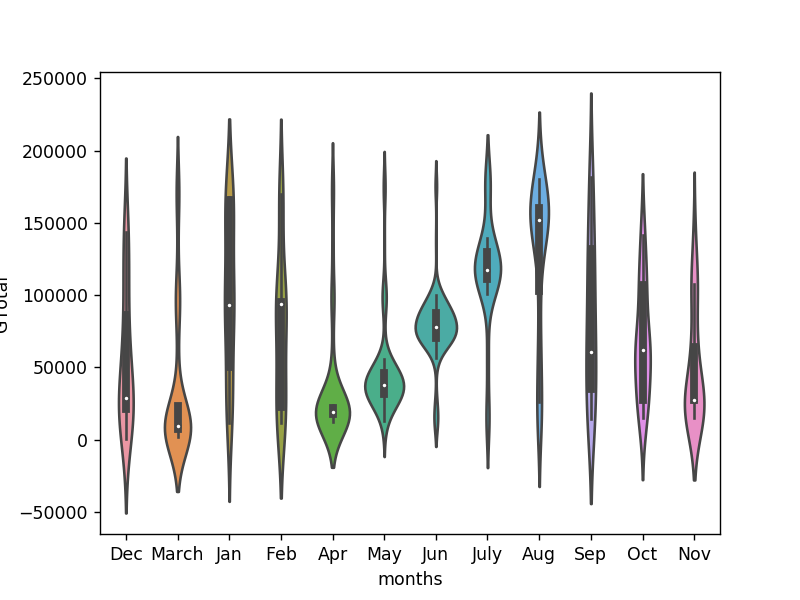

In [15]:
sns.violinplot(x="months", y='GTotal', data=Totem)

# Part 2 : Applying two-way ANNOVA on "Accident vélo" data set

## Introduction

In this paragraph, we will apply the two-way ANOVA  on "Accidents de velo" data set. We will start by constructing the dataframe before using the "ols" fuction of the "statsmodels" package to apply ANOVA. Finally, we will explore the results.


## "Accidents de velo" data set description

"Accidents de velo" is a data set that describes individuals that have had an accident on a road that is open to public circulation between 2005 and 2017. It contains 36 variables describing the conditions of the accident. We will use for our ANNOVA application the following factors : 

$\bullet$ The departement : A categorical variable with two modalities, "34" wich refers to the "Hérault" departement in France, and "30" that refers to "Gard" departement in France. 

$\bullet$ The day : Categorical variable with 7 modalities that refer to the day of the week.

We will be using the ANOVA on these two factors in order to examine whether or not they have an impact on the number of accidents per day. In order to do that, we will have to construct a data frame from the "Accidents de velo" data set describes previously. 

First we will import the necessary packages :

In [2]:
import pandas as pd
import numpy as np

Then we will import the "Accidents de velo" data set :

In [3]:
start_data = pd.read_csv("bicycle_db.csv", sep = ",")
start_data.head(5)

c:\users\sahba\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (5,6,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,identifiant accident,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
0,200500000030,2005-01-13,01 - janvier,3 - jeudi,19.0,62,62331,50.300,2.840,oui,...,NaN,NaN,NaN,Véhicule,Côté gauche,Changeant de file à gauche,200500000030B02,Transport en commun,Dépassant à gauche,1.0
1,200500000034,2005-01-19,01 - janvier,2 - mercredi,10.0,62,62022,0.000,0.000,non,...,NaN,NaN,NaN,Véhicule,Avant,Sans changement de direction,200500000034B02,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...",Tournant à gauche,1.0
2,200500000078,2005-01-26,01 - janvier,2 - mercredi,13.0,02,02173,0.000,0.000,non,...,Casque,Non,NaN,Véhicule,Avant,Sans changement de direction,200500000078B02,VL seul,Tournant à gauche,1.0
3,200500000093,2005-01-03,01 - janvier,0 - lundi,13.0,02,02810,49.255,3.094,oui,...,NaN,NaN,NaN,Véhicule,Avant gauche,Manœuvre d’évitement,200500000093B02,VL seul,Manœuvre d’évitement,1.0
4,200500000170,2005-01-29,01 - janvier,5 - samedi,18.0,76,76196,0.000,0.000,non,...,Autre,Oui,NaN,Véhicule,Arrière,"Même sens, même file",200500000170A01,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...","Même sens, même file",1.0


Now we will creat a variable called "nbr_accidents" that will be the number of accidents per day :

In [4]:
start_data['nbr_accidents'] = 1

In [5]:
start_data.head()

,identifiant accident,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,...,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules,nbr_accidents
0,200500000030,2005-01-13,01 - janvier,3 - jeudi,19.0,62,62331,50.300,2.840,oui,...,NaN,NaN,Véhicule,Côté gauche,Changeant de file à gauche,200500000030B02,Transport en commun,Dépassant à gauche,1.0,1
1,200500000034,2005-01-19,01 - janvier,2 - mercredi,10.0,62,62022,0.000,0.000,non,...,NaN,NaN,Véhicule,Avant,Sans changement de direction,200500000034B02,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...",Tournant à gauche,1.0,1
2,200500000078,2005-01-26,01 - janvier,2 - mercredi,13.0,02,02173,0.000,0.000,non,...,Non,NaN,Véhicule,Avant,Sans changement de direction,200500000078B02,VL seul,Tournant à gauche,1.0,1
3,200500000093,2005-01-03,01 - janvier,0 - lundi,13.0,02,02810,49.255,3.094,oui,...,NaN,NaN,Véhicule,Avant gauche,Manœuvre d’évitement,200500000093B02,VL seul,Manœuvre d’évitement,1.0,1
4,200500000170,2005-01-29,01 - janvier,5 - samedi,18.0,76,76196,0.000,0.000,non,...,Oui,NaN,Véhicule,Arrière,"Même sens, même file",200500000170A01,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...","Même sens, même file",1.0,1


Now we will keep only 4 variables : "identifiant accident" as it allows us to group by accidents, "jour", "departement", "nbr_accidents".

In [6]:
## We will only keep the important variables
data = start_data[['identifiant accident', 'jour', 'departement', 'nbr_accidents']]

In [7]:
data.head(5)

,identifiant accident,jour,departement,nbr_accidents
0,200500000030,3 - jeudi,62,1
1,200500000034,2 - mercredi,62,1
2,200500000078,2 - mercredi,02,1
3,200500000093,0 - lundi,02,1
4,200500000170,5 - samedi,76,1


Now we will only keep the accidents that happened in the "Hérault" or the "Gard" departements in France :

In [8]:
dfa = data[data["departement"].isin(['34','30'])]

The next step consists of grouping by accidents our data frame, in other words, each observation will in the following form : 

["day", "which day of the week", "wich departement", "the number of accidents in that day]

In [11]:
df = dfa.groupby(['identifiant accident', 'jour', 'departement'], as_index=False)['nbr_accidents'].sum()

Now we will remove the "identifiant accident" variable :

In [ ]:
del df['identifiant accident']

Our data frame is now good to go :

In [12]:
df.head(5)

,identifiant accident,jour,departement,nbr_accidents
0,200500001482,1 - mardi,34,1
1,200500003254,3 - jeudi,34,1
2,200500007517,3 - jeudi,30,1
3,200500007524,4 - vendredi,30,1
4,200500007555,5 - samedi,30,1


## ANOVA application :

After Constructiong our data frame, it's time to apply the the ANOVA on our data frame :

We'll start by importing the statsmodels package :


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Now we'll fit the model :

In [ ]:
model = ols('nbr_accidents ~ C(jour) + C(departement) + C(jour):C(departement)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

We can see the following p-values for each of the factors in the table:

$\bullet$ jour : P-value = 0.784277

$\bullet$ departement : P-value = 0.643167

$\bullet$ jour*departement : P-value = 0.454370

Since all P-values are greater than 0.05, this means that none of the two factors have a statistically significant effect on the number of accidents.

And since the p-value for the interaction effect (0.454370) is greater than 0.05, this tells us that there is no significant interaction effect between the day of the occurrence of the accidents and departement of occurrence.